In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [19]:
muscle = cv2.imread("./images/muscle.png")

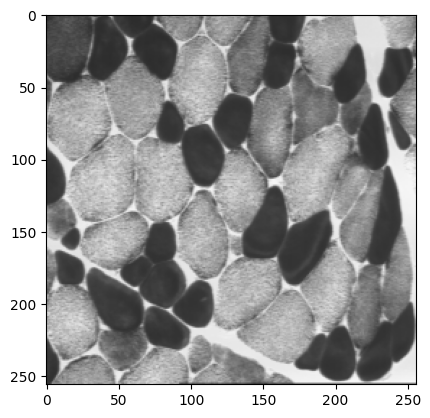

In [20]:
plt.imshow(muscle, cmap='gray')
plt.show()

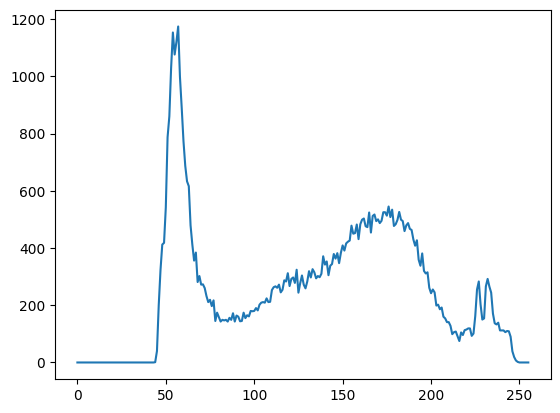

In [21]:
hist = cv2.calcHist([muscle], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

# Expansión

In [22]:
I_min = np.min(muscle)
I_max = np.max(muscle)

muscle_exp = ((muscle - I_min) * (255 / (I_max - I_min))).astype(np.uint8)

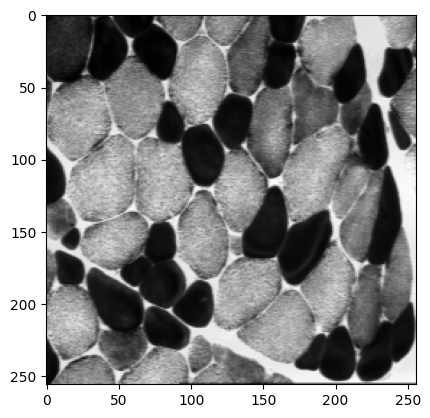

In [23]:
plt.imshow(muscle_exp, cmap='gray')
plt.show()

Ahora se puede apreciar en negro el color a colorear

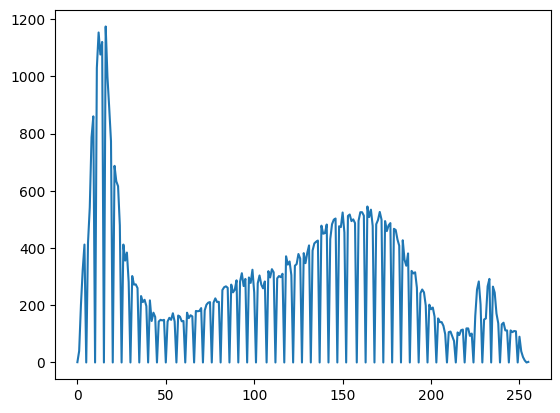

In [24]:
hist_exp = cv2.calcHist([muscle_exp], [0], None, [256], [0, 256])
plt.plot(hist_exp)
plt.show()

Las fibras negras son la primera gran "montaña" del histograma, por lo que en la imagen original se pintarán de blanco los pixeles que en la imagen extendida tengan un valor por debajo de 50 (fin aproximado de la primera montaña)

In [25]:
muscle_exp[4][4][0]

np.uint8(26)

In [26]:
img_pintada = muscle.copy()

limite = 50

for i in range(len(img_pintada)):
    for j in range(len(img_pintada[0])):
        if muscle_exp[i][j][0] < limite:
            img_pintada[i][j] = 255


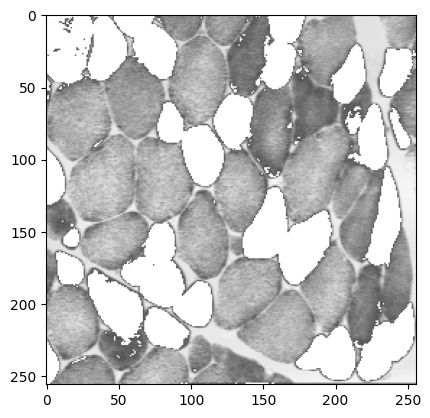

In [27]:
plt.imshow(img_pintada, cmap='gray')
plt.show()